In [256]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
#Please comment out this line of code if unnecessary
uploaded = files.upload()

Saving Credit Card Customer Data.xlsx to Credit Card Customer Data (6).xlsx


EDA

In [257]:
data_xls = pd.read_excel('Credit Card Customer Data.xlsx', index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)
Data = pd.read_csv("csvfile.csv")
Data.head(10) #several missing values!

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [258]:
#checking types of data to see what invalid data I need to analyze for
Data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [259]:
#how many rows and columns
Data.shape

(660, 7)

In [260]:
#general info about data
Data.info

<bound method DataFrame.info of      Sl_No  Customer Key  ...  Total_visits_online  Total_calls_made
0        1         87073  ...                    1                 0
1        2         38414  ...                   10                 9
2        3         17341  ...                    3                 4
3        4         40496  ...                    1                 4
4        5         47437  ...                   12                 3
..     ...           ...  ...                  ...               ...
655    656         51108  ...                   10                 0
656    657         60732  ...                   13                 2
657    658         53834  ...                    9                 1
658    659         80655  ...                   15                 0
659    660         80150  ...                   12                 2

[660 rows x 7 columns]>

In [261]:
#describe data. Based on analysis, it makes sense to not analyze S1_No univariately as it is an index value. Analyzed all other columns.
Data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


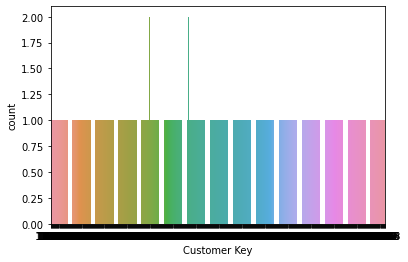

In [262]:
#Univariate analysis of Customer Key. Used countplot and found one value of each key.
sns.countplot(Data["Customer Key"])

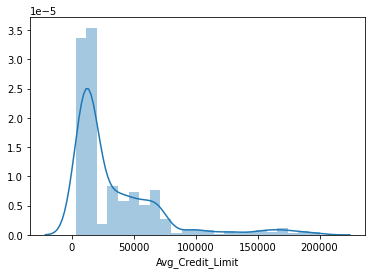

In [263]:
#Univariate analysis with distplot of average credit limits as there are various credit limits.
sns.distplot(Data["Avg_Credit_Limit"])

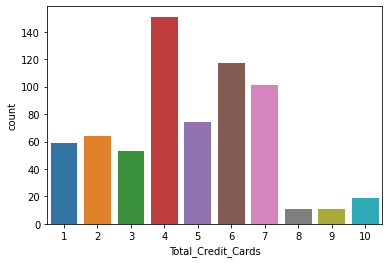

In [264]:
#countplot for total credit cards
sns.countplot(Data["Total_Credit_Cards"])

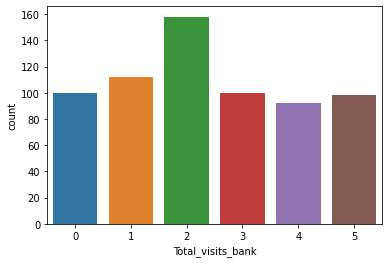

In [265]:
#count plot for bank visits
sns.countplot(Data["Total_visits_bank"])

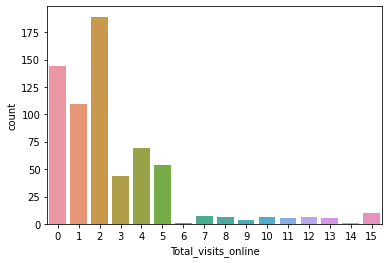

In [266]:
#count plot for visits online
sns.countplot(Data["Total_visits_online"])

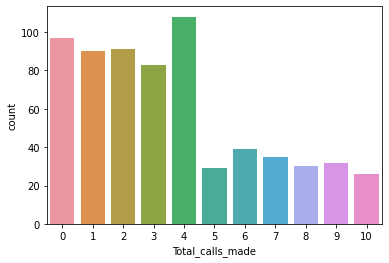

In [267]:
#count plot for calls madee
sns.countplot(Data["Total_calls_made"])

In [268]:
#Correlated data with kendall method
Data.corr(method='kendall')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.035219,0.511875,0.555316,0.301461,-0.261829,-0.483440
Customer Key,0.035219,1.000000,0.048772,-0.005471,-0.002259,0.005778,-0.000494
Avg_Credit_Limit,0.511875,0.048772,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.555316,-0.005471,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.301461,-0.002259,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.261829,0.005778,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.483440,-0.000494,-0.326996,-0.492532,-0.373968,0.310855,1.000000


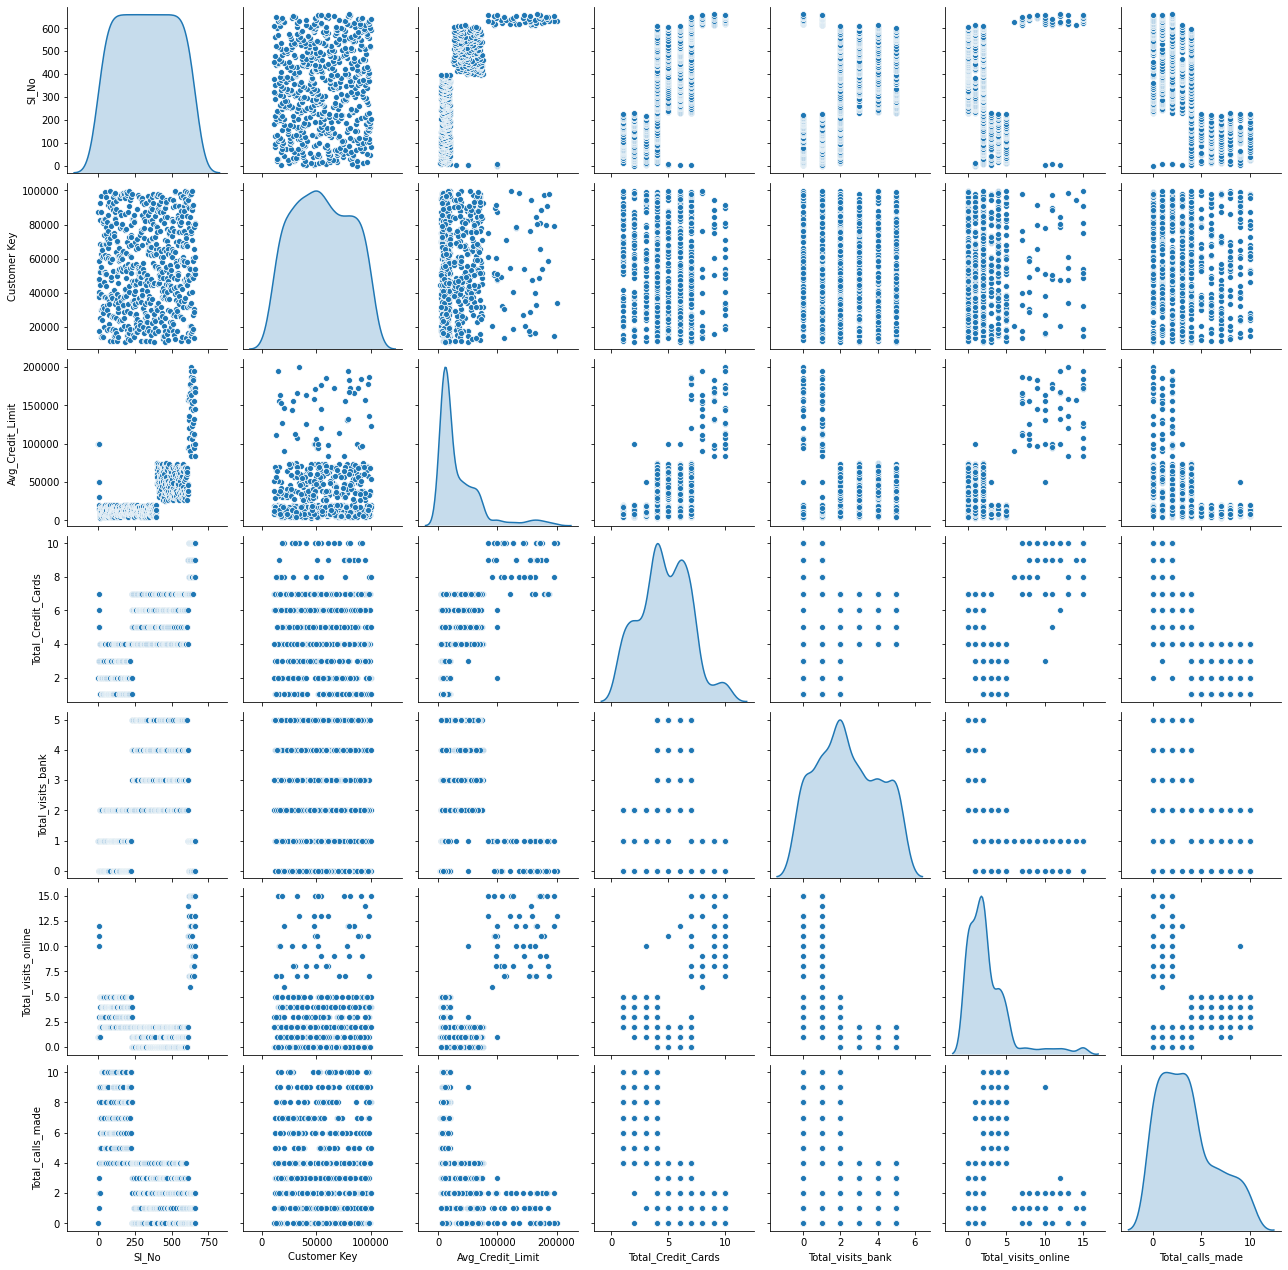

In [269]:
#plotted all data values
sns.pairplot(Data,diag_kind='kde')

Observations:


* From diagonal plots we can see origin has 4 points (evident from data)
* total_calls_made, total_visits_online, total_visits_bank, total_credit_cards, avg_credit_limits - shows four peaks majorily
* customer key and si_no is normal
* total_visits_bank is 6 clusters
* from bivariate plots we can see that Total_visits_online has negative linear relationship with Sl_No, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank	
* (correlation too gives high negative correlation)
* Total_calls_made too shows negative correlation with levels

In [270]:
#Groups by total visits online
Data.groupby(Data["Total_visits_online"]).mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_calls_made
Total_visits_online,,,,,,
0,422.090278,55958.270833,35131.944444,5.534722,3.506944,2.069444
1,412.256881,51327.862385,34091.743119,5.422018,3.229358,2.009174
2,327.449735,56814.100529,25523.809524,4.582011,2.867725,3.296296
3,135.045455,55843.022727,13272.727273,2.590909,0.977273,6.931818
4,115.478261,56169.376812,12739.130435,2.536232,0.898551,6.913043
5,112.018519,51780.148148,12129.629630,2.277778,0.962963,7.037037
6,626.000000,20337.000000,91000.000000,8.000000,1.000000,1.000000
7,632.285714,49795.428571,149857.142857,8.428571,0.714286,0.857143
8,644.333333,44564.500000,130666.666667,8.666667,0.500000,0.833333


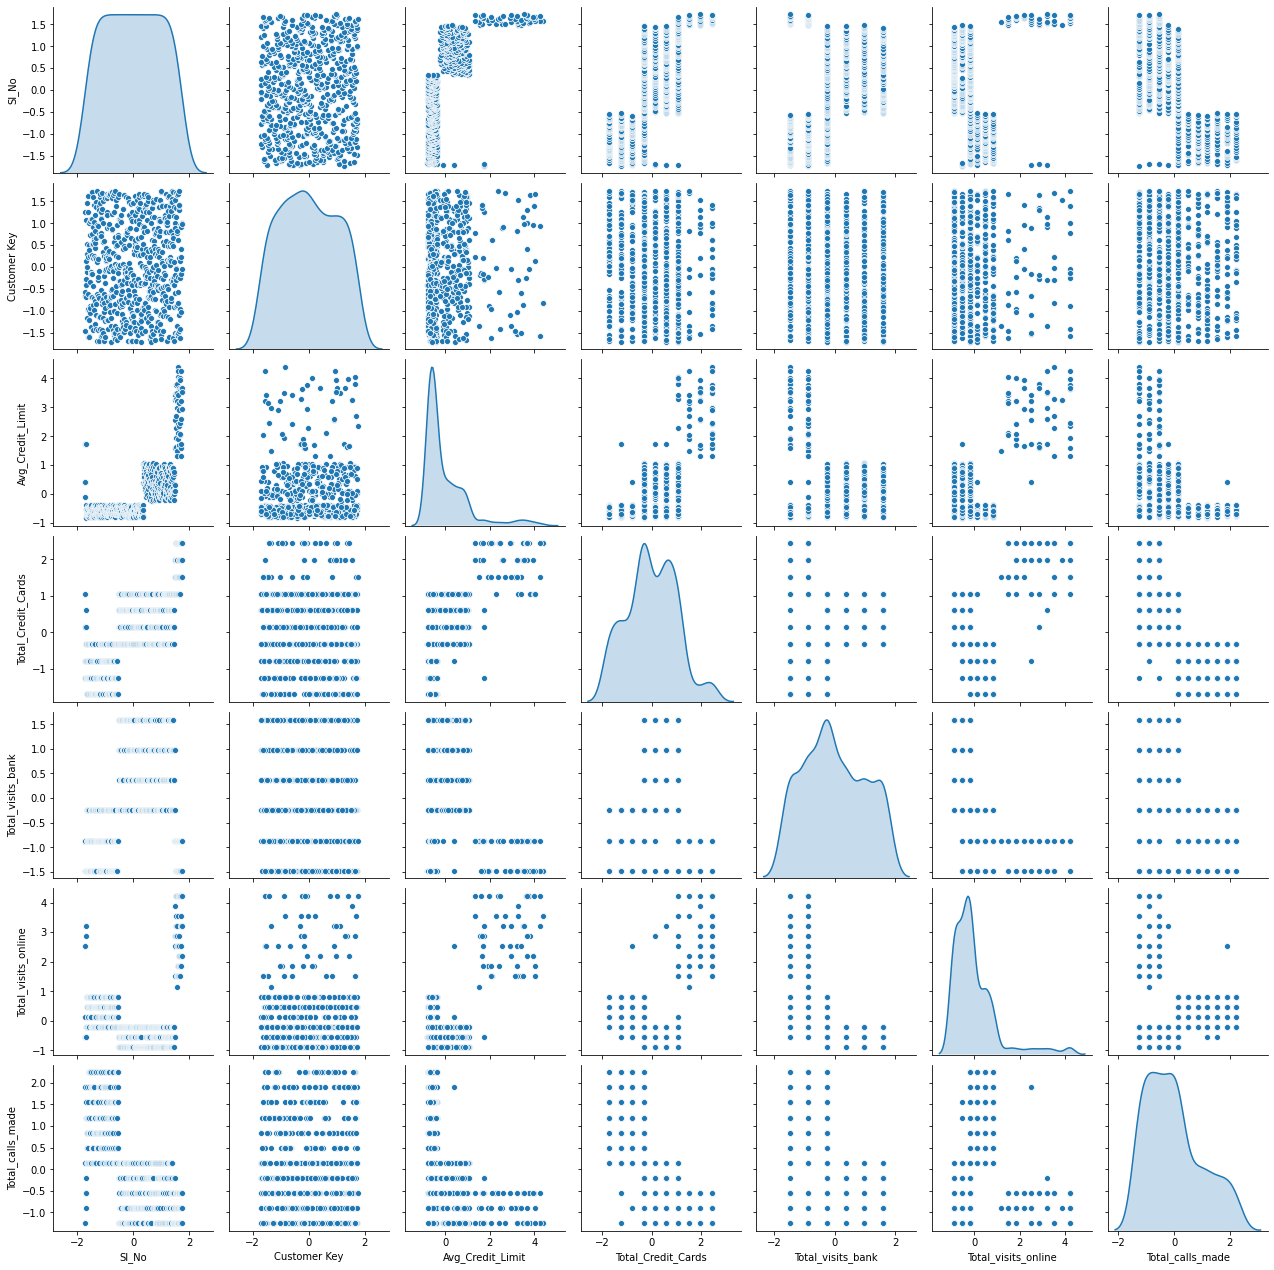

In [271]:
Data_appl=Data.apply(zscore)
sns.pairplot(Data_appl,diag_kind='kde')

In [272]:
#Dropped S1_No and Customer Key as these can be used to index data and identify the data but are not relevant for the data analysis
Data_new = Data.drop(['Sl_No','Customer Key'], axis =1)
Data_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [273]:
#Correlated cleaned data with kendall method
Data_new.corr(method='kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


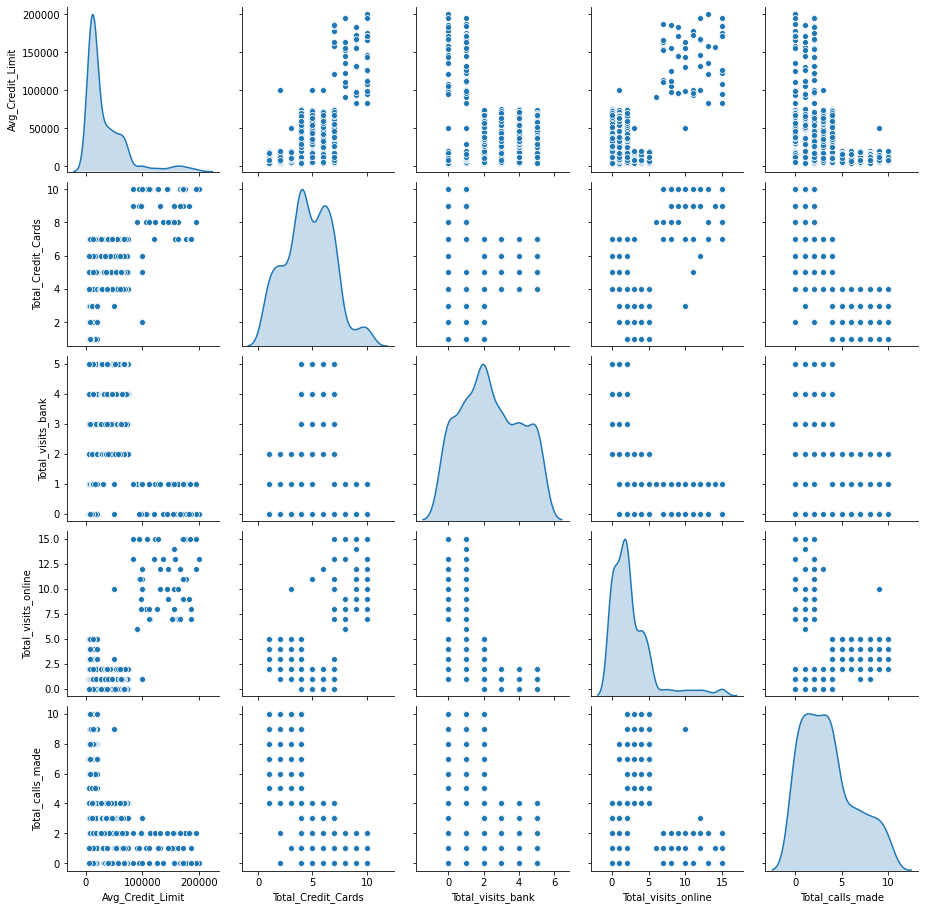

In [274]:
#plotted all cleaned data values
sns.pairplot(Data_new,diag_kind='kde')

Observations:


* From diagonal plots we can see origin has 4 points (evident from data)
* total_calls_made, total_visits_online, total_visits_bank, total_credit_cards, avg_credit_limits - shows four peaks majorily
* total_visits_bank is 6 clusters
* from bivariate plots we can see that Total_visits_online has negative linear relationship with Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank	
* (correlation too gives high negative correlation)
* Total_calls_made too shows negative correlation with levels

In [275]:
#Groups by total visits online
Data_new.groupby(Data_new["Total_visits_online"]).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_calls_made
Total_visits_online,,,,
0,35131.944444,5.534722,3.506944,2.069444
1,34091.743119,5.422018,3.229358,2.009174
2,25523.809524,4.582011,2.867725,3.296296
3,13272.727273,2.590909,0.977273,6.931818
4,12739.130435,2.536232,0.898551,6.913043
5,12129.629630,2.277778,0.962963,7.037037
6,91000.000000,8.000000,1.000000,1.000000
7,149857.142857,8.428571,0.714286,0.857143
8,130666.666667,8.666667,0.500000,0.833333


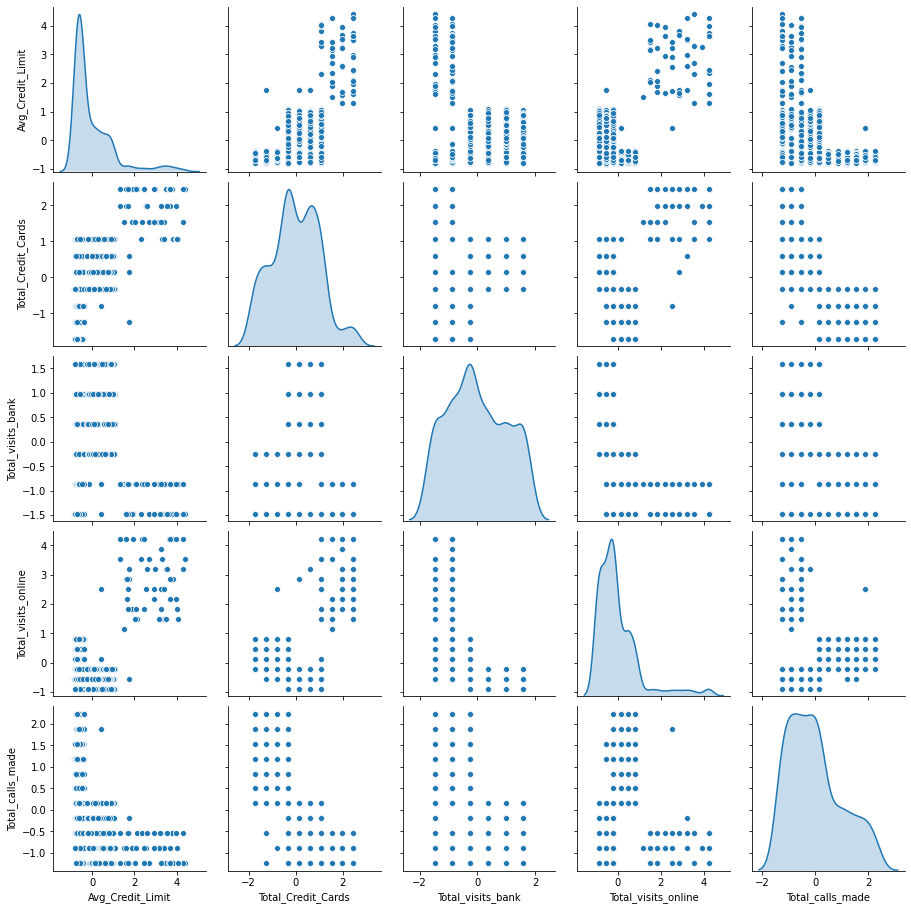

In [276]:
Data_new_appl=Data_new.apply(zscore)
sns.pairplot(Data_new_appl,diag_kind='kde')

Kmeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

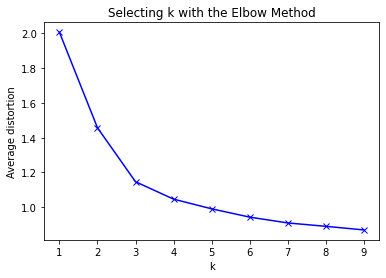

In [277]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Data_new_appl)
    prediction=model.predict(Data_new_appl)
    meanDistortions.append(sum(np.min(cdist(Data_new_appl, model.cluster_centers_, 'euclidean'), axis=1)) / Data_new_appl.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [278]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(Data_new_appl)
prediction=final_model.predict(Data_new_appl)

#Append the prediction 
Data_new["GROUP"] = prediction
Data_new_appl["GROUP"] = prediction
print("Groups Assigned : \n")
Data_new.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [279]:
newDataClust = Data_new.groupby(['GROUP'])
newDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2dae544a8>,
      dtype=object)

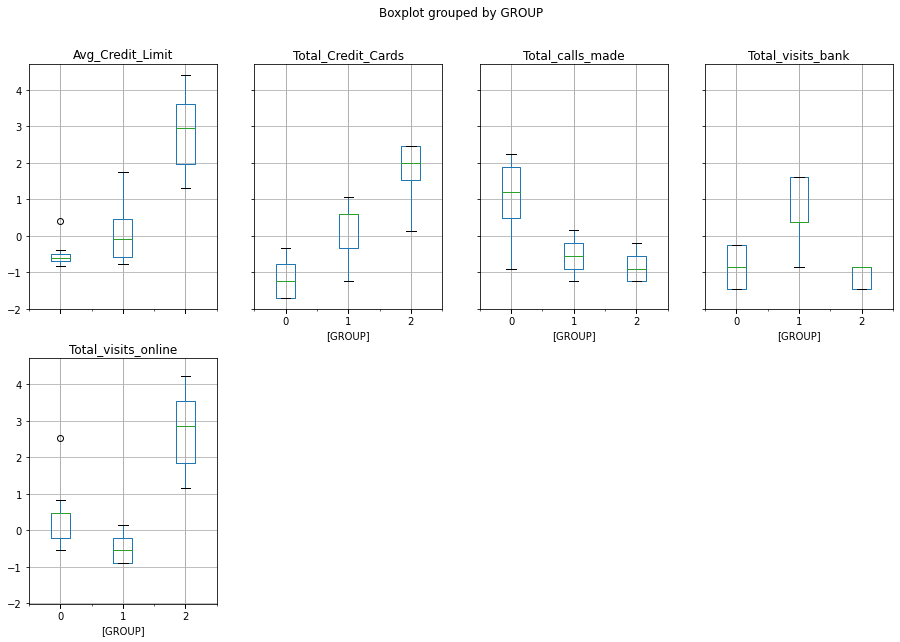

In [280]:
Data_new_appl.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Hierarchical Clustering

In [281]:
from sklearn.cluster import AgglomerativeClustering 

In [282]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [283]:
model.fit(Data_new_appl)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [284]:
Data_new_appl['labels'] = model.labels_
Data_new_appl.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0,2


In [285]:
custDataClust = Data_new_appl.groupby(['labels'])

In [286]:
custDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,,
0,-0.021062,0.373690,0.666395,-0.553672,-0.553005,1
1,2.831764,1.862226,-1.105763,2.827319,-0.874330,2
2,-0.595796,-1.059623,-0.901518,0.322997,1.148109,0


In [287]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [288]:
Z = linkage(Data_new_appl, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Data_new_appl))
c

0.9326509851302

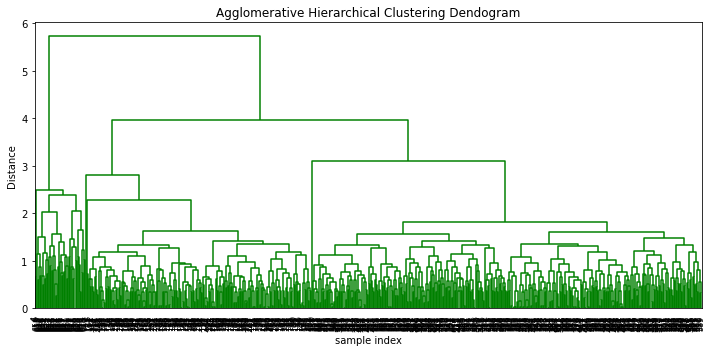

In [289]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [290]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Data_new_appl, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(Data_new_appl))

c

0.9200216505568093

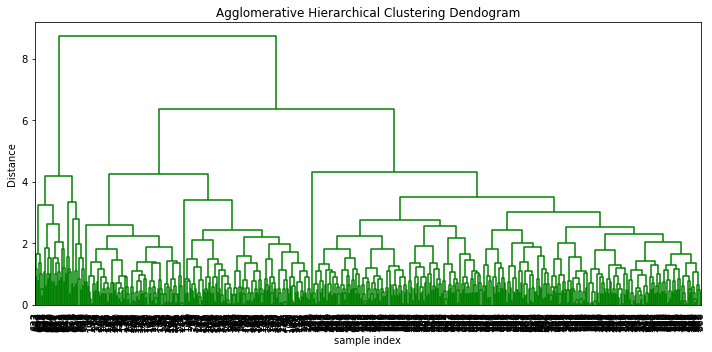

In [291]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [292]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Data_new_appl, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(Data_new_appl))

c

0.8237257149884929

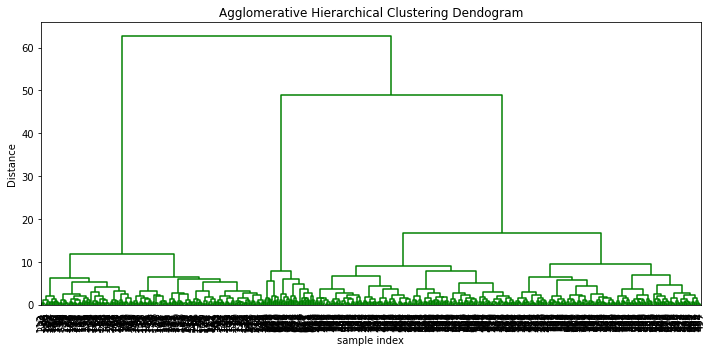

In [293]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

Silhouette Score

In [294]:
from scipy.cluster.hierarchy import fcluster
max_d = 47
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [295]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(Data_new_appl),columns=Data_new_appl.columns)
silhouette_score(X_std,clusters)

0.633462419239265

In [296]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Data_new_appl)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Data_new_appl, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5140347596040015)
For n_clusters = 3, silhouette score is 0.6047553572064851)
For n_clusters = 4, silhouette score is 0.3952531823360013)
For n_clusters = 5, silhouette score is 0.27663396860765416)
For n_clusters = 6, silhouette score is 0.2599318813707678)
For n_clusters = 7, silhouette score is 0.2526425639694916)
For n_clusters = 8, silhouette score is 0.25042559840679013)
For n_clusters = 9, silhouette score is 0.22669839324135316)


Clusters Comparison	

In [297]:
Data_new = Data.drop(['Sl_No','Customer Key'], axis =1)
Data_new_appl=Data_new.apply(zscore)
kmeans = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans.fit(Data_new_appl)
kmeans_predictions = kmeans.predict(Data_new_appl)
kmeans_predictions

array([2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [298]:
Data_new_appl["group"] = kmeans_predictions
Data_new_appl['group'] = Data_new_appl['group'].astype('category')
Data_new_appl.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2d98bf550>,
      dtype=object)

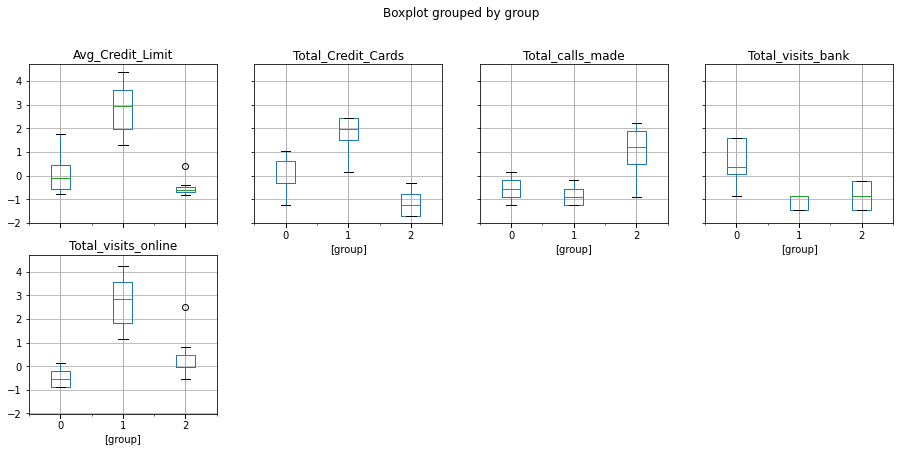

In [299]:
Data_new_appl["group"] = predictions
Data_new_appl.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [300]:
Data_new = Data.drop(['Sl_No','Customer Key'], axis =1)
Data_new_appl=Data_new.apply(zscore)
hierClust = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
hierClust.fit(Data_new_appl)
predictions = hierClust.fit_predict(Data_new_appl)
predictions

array([0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2d92c7358>,
      dtype=object)

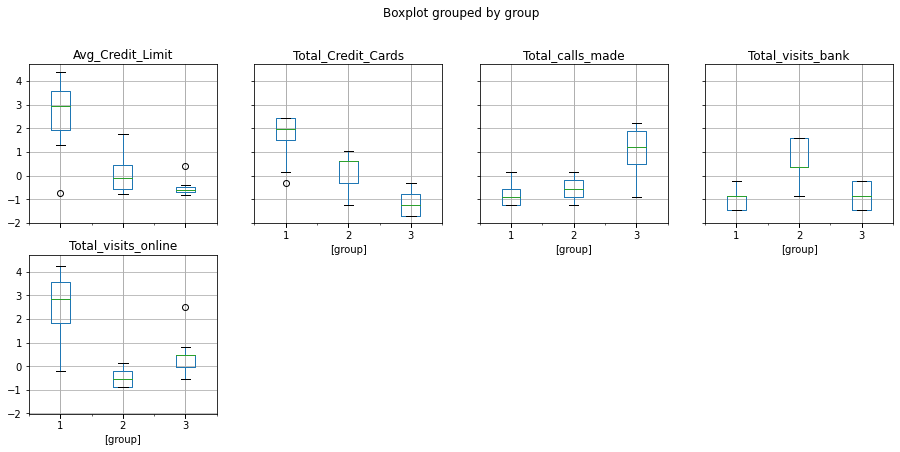

In [301]:
Data_new_appl["group"] = predictions
Data_new_appl.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))